<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Linear Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 939eb898466ee5be6cdb199e36915f5d2e2df668

matplotlib: 3.3.2
numpy     : 1.20.1
watermark : 2.1.0
json      : 2.0.9



In [3]:
plt.style.use('./d4sci.mplstyle')

## Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

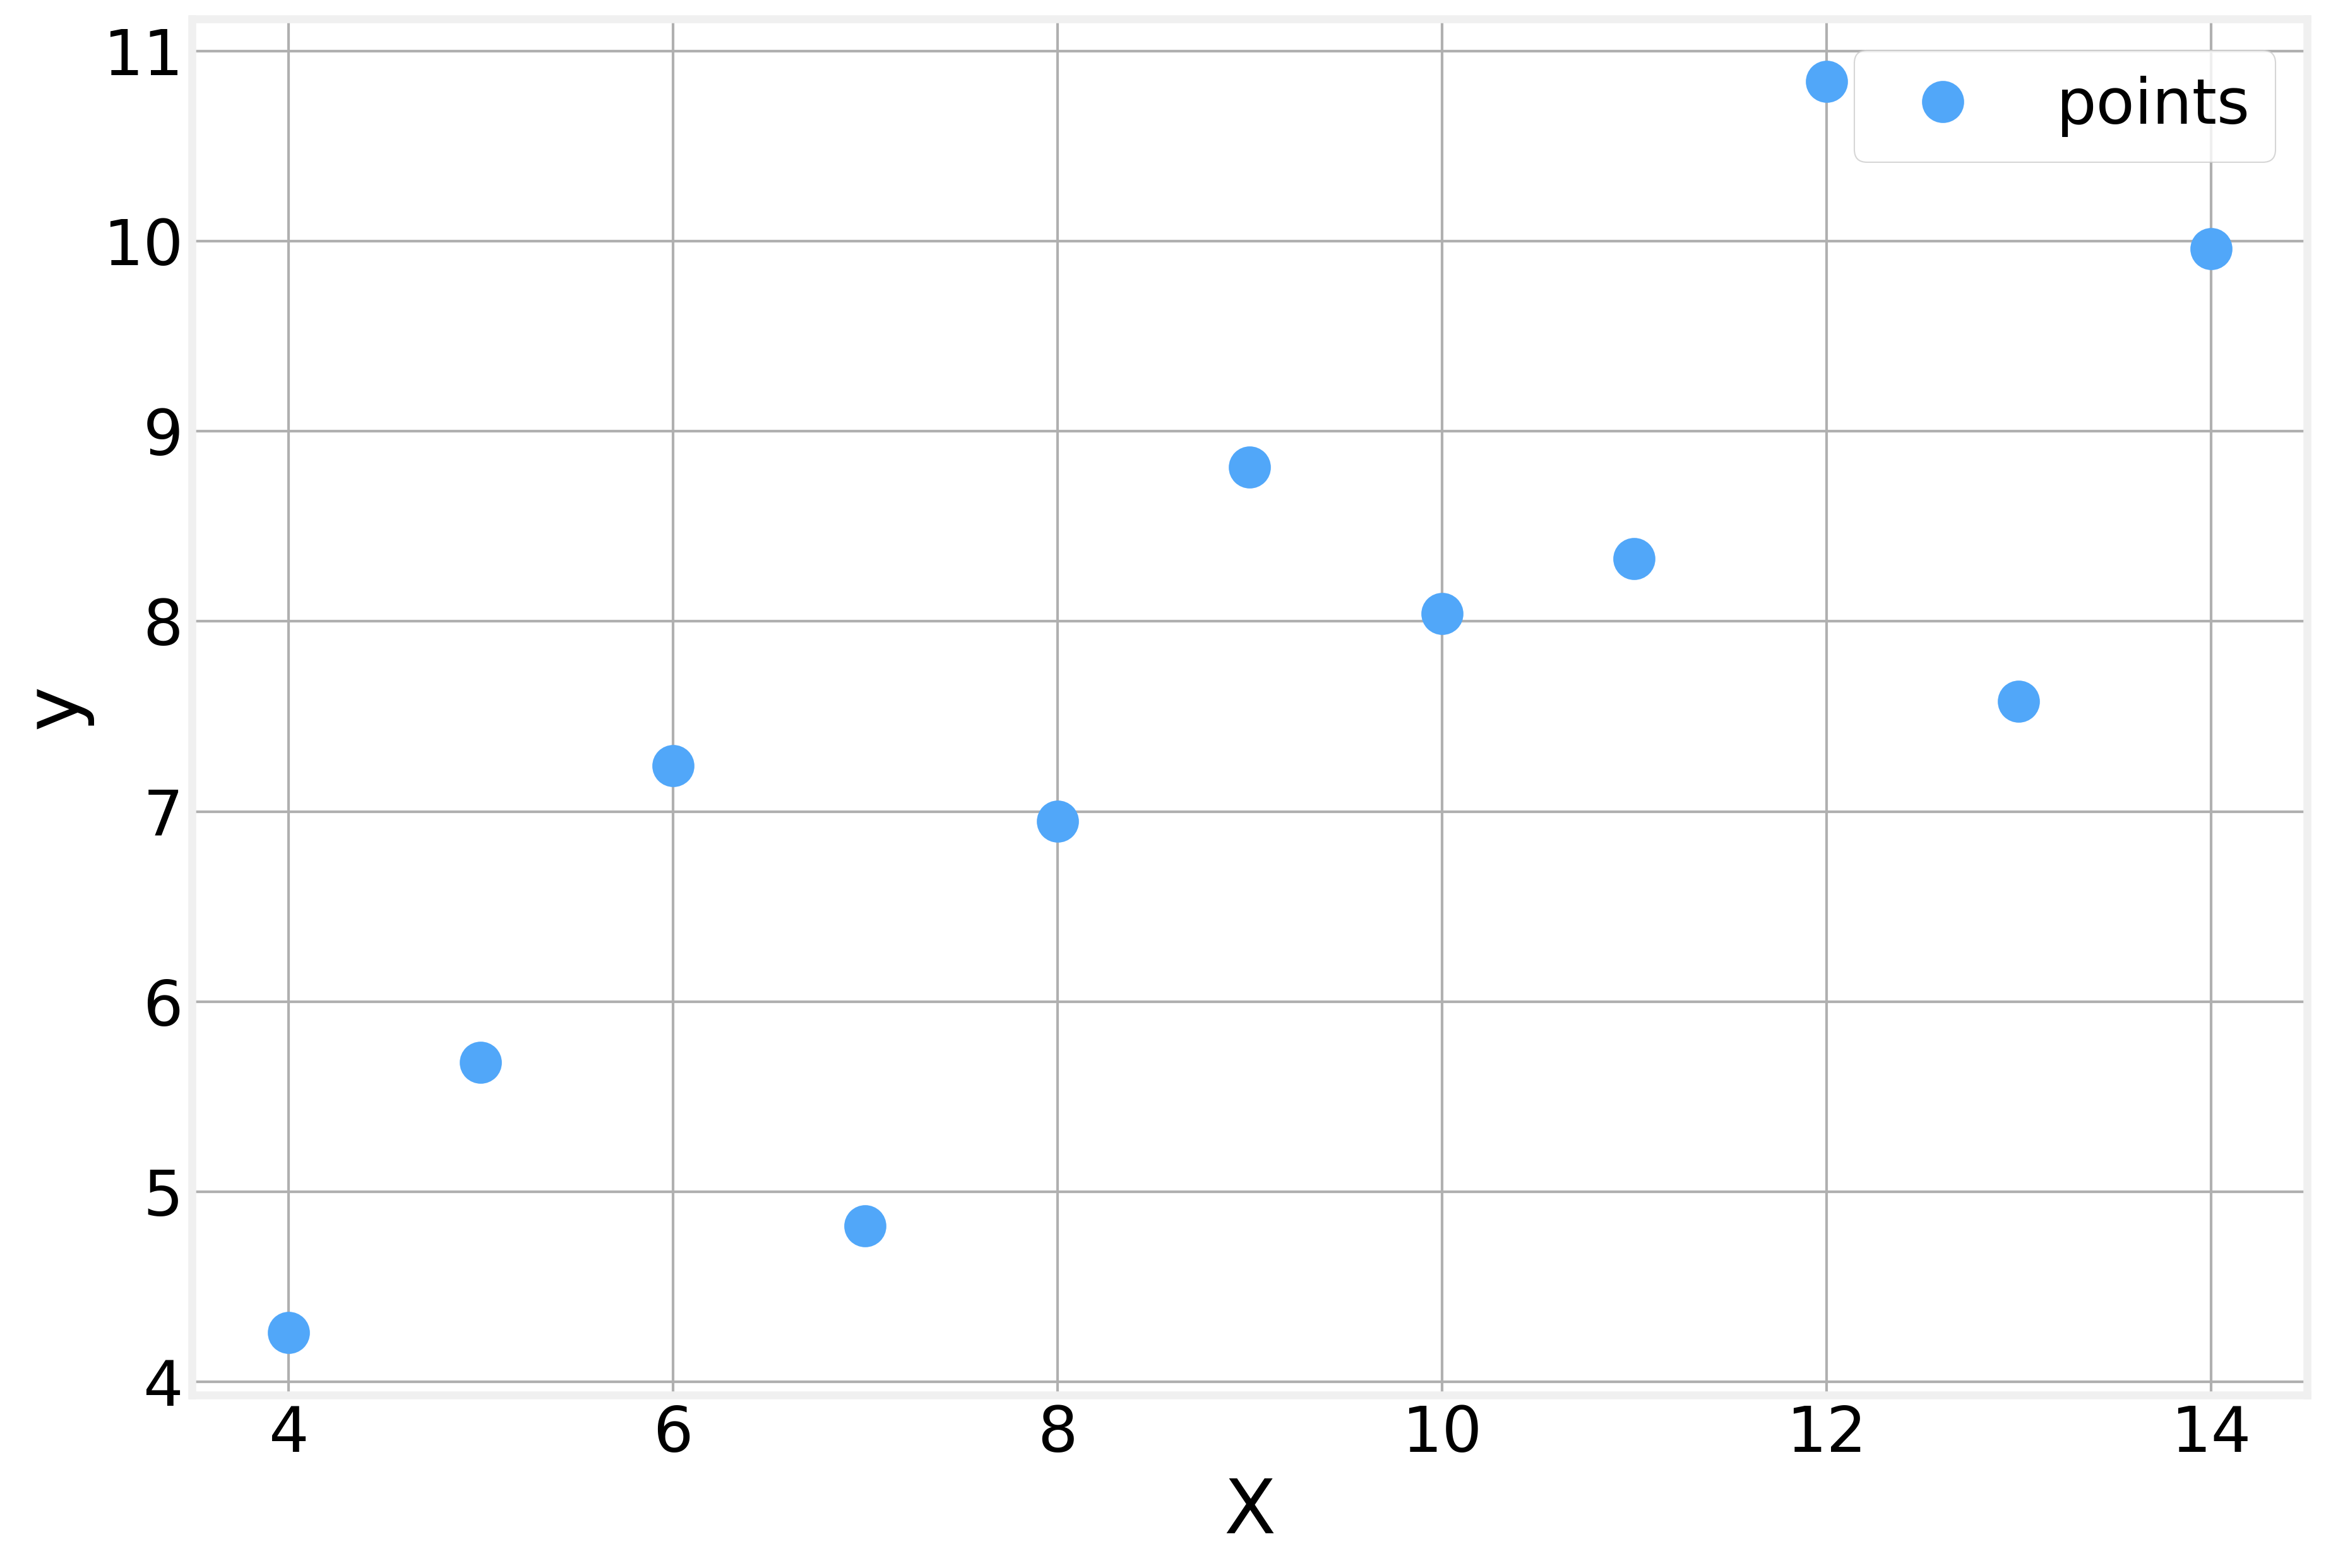

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) #Add x0

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01
epsilon = 0.12

weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 0.9790515399297604 0.0007705909902928632 [0.46648258 0.75096757]
200 0.9098809936867813 0.0006197960495256671 [0.72786286 0.72508582]
300 0.8542462512033814 0.0004985097773620994 [0.96227779 0.70187417]
400 0.8094985263506469 0.00040095769941683734 [1.17250924 0.68105716]
500 0.773507367047743 0.00032249533313588596 [1.36105212 0.66238773]
600 0.7445592238241485 0.0002593870626383943 [1.53014393 0.64564434]
700 0.7212758672353499 0.00020862828497458796 [1.68179135 0.63062829]
800 0.7025487699616534 0.00016780236010482952 [1.81779402 0.61716137]
900 0.6874863295029093 0.0001349655539764072 [1.93976595 0.60508377]
1000 0.6753714187264341 0.00010855449678282003 [2.04915461 0.59425216]
1100 0.6656272432374772 8.731175047749229e-05 [2.14725817 0.58453799]
1200 0.6577898800318029 7.022594178296426e-05 [2.23524086 0.57582599]
1300 0.6514861899877062 5.6483610423430086e-05 [2.31414679 0.56801276]
1400 0.6464160526048592 4.543048003990968e-05 [2.38491237 0.56100559]
1500 0.642338077180763 3

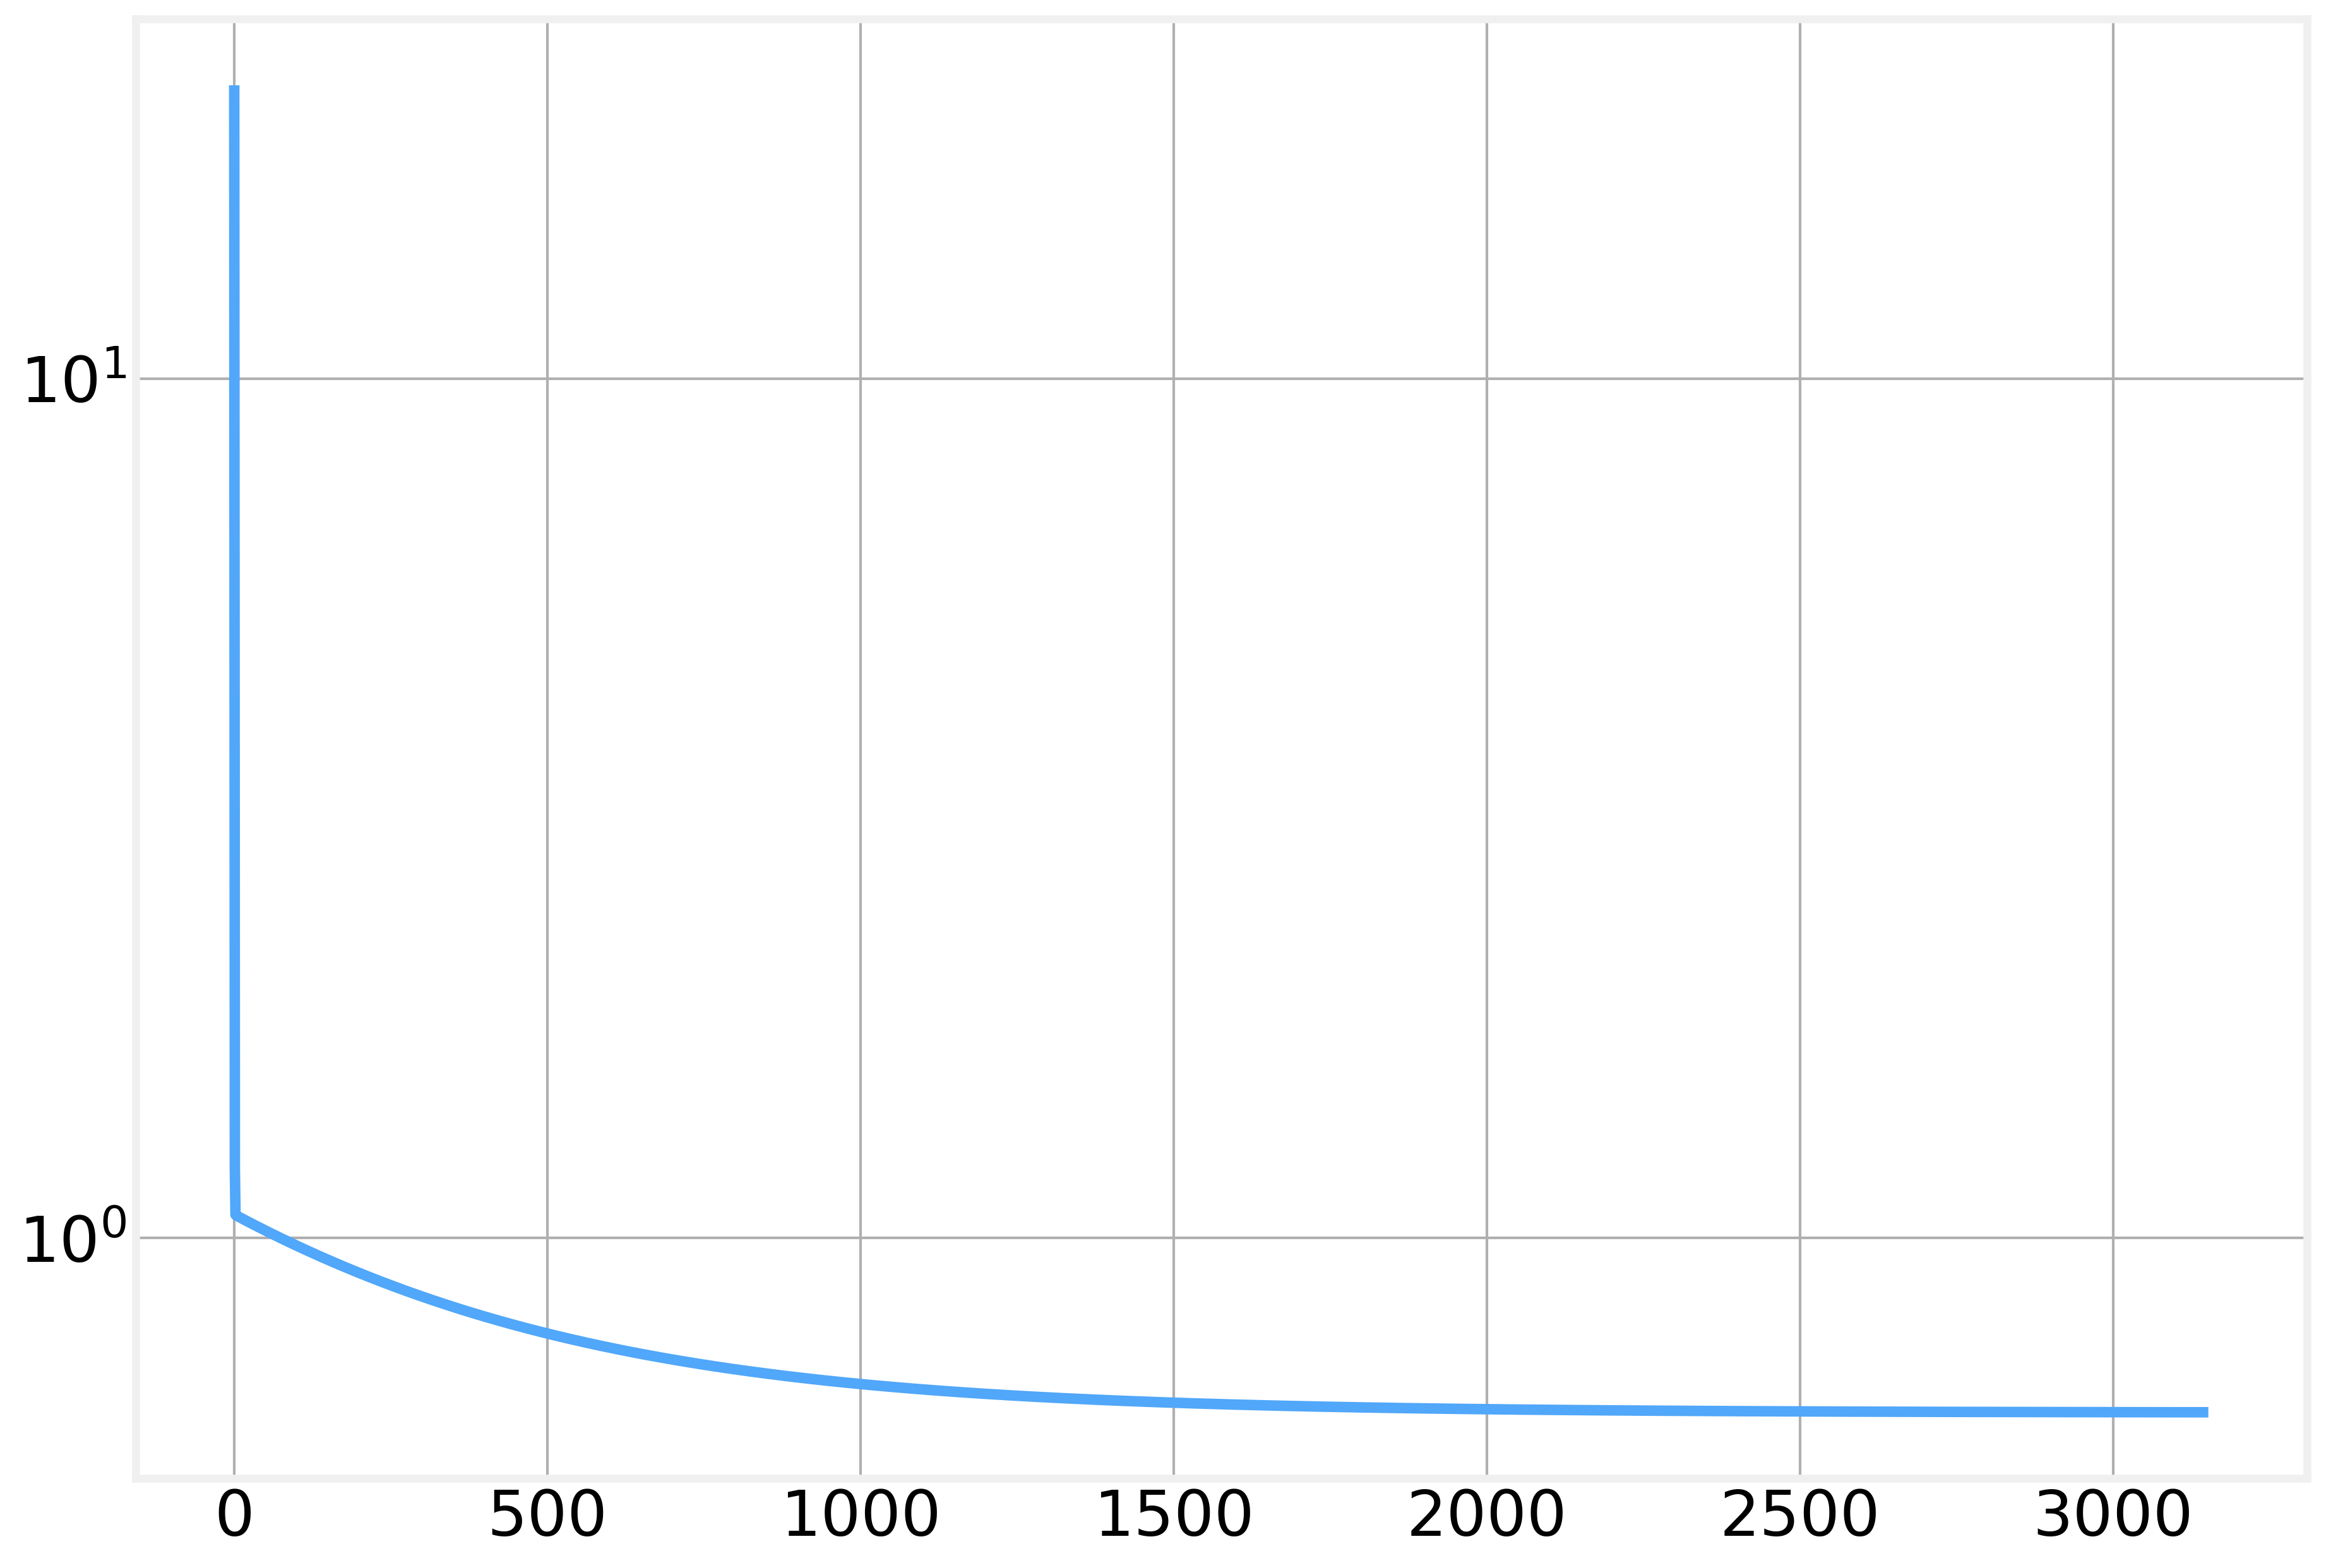

In [14]:
plt.semilogy(Js)

In [15]:
weights.flatten()

array([2.90887928, 0.50912264])

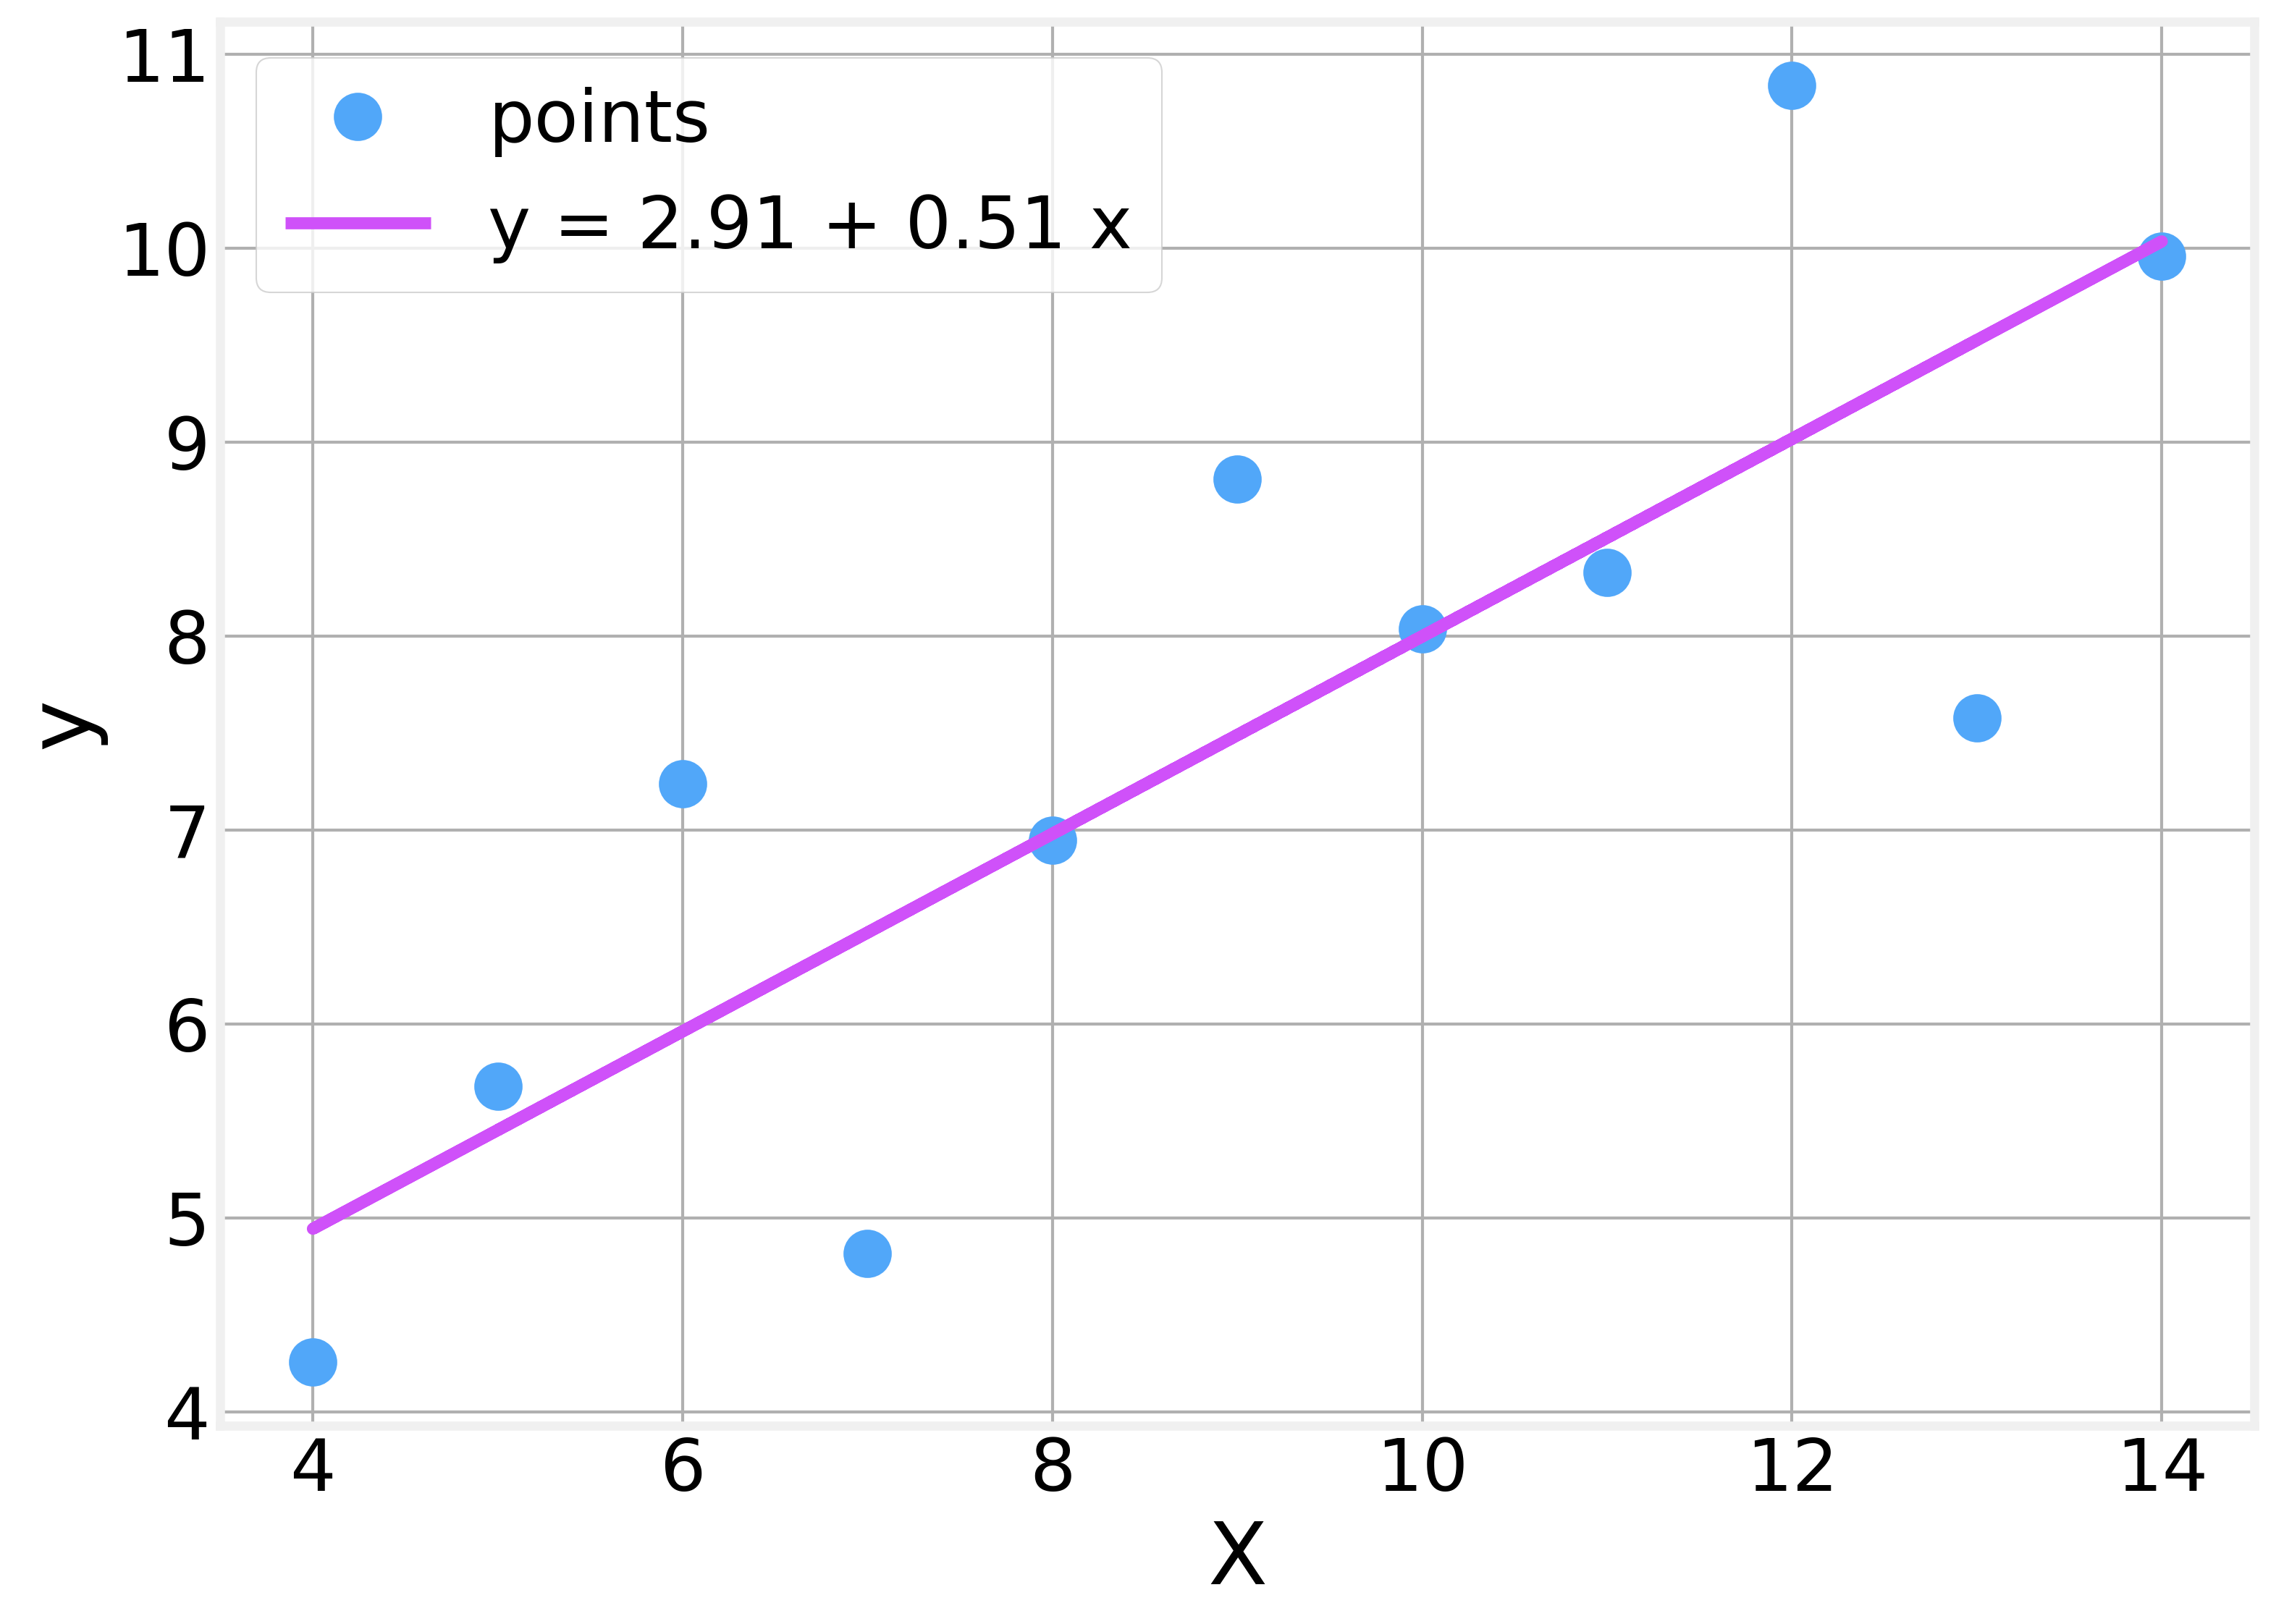

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.gcf().set_size_inches(11, 8)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>